# Unit 5 - Financial Planning


In [ ]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv()

In [ ]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3 


In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [363]:
# Testing - to see the outlay of Json output since I'm going to be pulling specific data out of the 'dict' or 'list' ojects returned. 
# We can see that the format is dict of a dict of a dict. So I will be able to proceed to identify the 'keys' for referencing dicts elements in the coming steps 
import json

btc_get = requests.get(btc_url)
btc_response = btc_get.content
btc_json = btc_get.json()

In [364]:
print(json.dumps(btc_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18662481,
            "total_supply": 18662481,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 54764.0,
                    "volume_24h": 60383477295,
                    "market_cap": 1021947363082,
                    "percentage_change_1h": 0.513908864156518,
                    "percentage_change_24h": 0.75250795608476,
                    "percentage_change_7d": -1.86651475306165,
                    "percent_change_1h": 0.513908864156518,
                    "percent_change_24h": 0.75250795608476,
                    "percent_change_7d": -1.86651475306165
                }
            },
            "last_updated": 1616539767
        }
    },
    "metadata": {
        "timestamp": 1616539767,
        "num_cryp

In [365]:
# Now to set up our variables and values for Ethereum 

eth_get = requests.get(eth_url)
eth_response = eth_get.content
eth_json = eth_get.json()
print(json.dumps(eth_json, indent=4))  #because of nesting, dict:dict:dict - it was infinitely easier to set default indent at 4, otherwise, the "keys" are not obvious at all.  I tried Indent 1,  and 2. Gerritt was correct, indent = 4 is very usable. 

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115173467,
            "total_supply": 115173467,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1676.45,
                    "volume_24h": 29285779219,
                    "market_cap": 192908157379,
                    "percentage_change_1h": 0.528047852076052,
                    "percentage_change_24h": -0.64714772606574,
                    "percentage_change_7d": -6.39852778579579,
                    "percent_change_1h": 0.528047852076052,
                    "percent_change_24h": -0.64714772606574,
                    "percent_change_7d": -6.39852778579579
                }
            },
            "last_updated": 1616539722
        }
    },
    "metadata": {
        "timestamp": 1616539722,
        "num_

In [366]:
# Fetch current BTC price
# I created each variable for pulling data from our API json get request.  I could have used the above variables already created, such as btc_json or 
# eth_json.  However, for clarity, this section of the work asked for new fetching the current price, so I created 2 new variables.  

btc_get = btc_json['data']['1']['quotes']['USD']['price']
eth_get = eth_json['data']['1027']['quotes']['USD']['price']

# Additionally, I could have added ^ the location keys to the actual 'compute' function below, so as to keep our btc_get and eth_get variables open to passing other 'keys' 
# and defining other values within the dict. 


# Compute current value of my crpto

my_btc_value = my_btc * btc_get
##my_eth_value = eth_url * eth_get
my_eth_value = my_eth * eth_get

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")  #:0.2 = Truncate to 2 decimal places - Python Native 
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")  #:0.2 = Truncate to 2 decimal places - Python Native 

The current value of your 1.2 BTC is $65716.80
The current value of your 5.3 ETH is $8885.18


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [367]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [368]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object 
# most commonly created as API = , but I like alpaca, because we are using multiple api.  It seemed clearer to me to name the variable specific to the api - hence 'alpaca'.
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)


In [369]:


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# Format current date as ISO format
# According to the Alpaca documention, only 2 variables are required, 'symbols' (here we have denoted as variables 'tickers'), and 'timeframe'
# I found out that I don't need to input "start_date" / "end_date" 

df_ticker = alpaca.get_barset(tickers,timeframe).df

df_ticker.sort_values("time", ascending=True)  #I then set the "time" as index to show the most recent close prices. 

df_ticker

#start_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()



#df_ticker = alpaca.get_barset(
#    tickers,
#    timeframe,
#    start=start_date,
#    end=end_date,
#    limit=1000,
#).df

# Preview DataFrame
# YOUR CODE HERE!

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-10-28 00:00:00-04:00  117.81  117.9550  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.7700  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.5200  117.2200  117.23  6522417   
2020-11-02 00:00:00-05:00  117.35  117.3500  117.1800  117.24  6263289   
2020-11-03 00:00:00-05:00  117.22  117.2200  117.0500  117.15  6215781   
...                           ...       ...       ...     ...      ...   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.4800  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.2000  113.42  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.3300  113.50  4674852   
2021-03-22 00:00:00-04:00  113.70  113.8000  113.6022  113.75  5321817   
2021-03-23 00:00:00-04:00  113.89  114.0400  113.7700  114.04  5022944   

                               SPY                                         
                              open      high       low   close     volume  
time                                                                       
2020-10-28 00:00:00-04:00  332.100  338.2483  326.1300  326.67  107939571  
2020-10-29 00:00:00-04:00  326.910  333.3950  325.0900  329.99   74362731  
2020-10-30 00:00:00-04:00  328.280  329.6900  322.6000  326.53   93413096  
2020-11-02 00:00:00-05:00  330.200  332.3600  327.2400  330.21   69167640  
2020-11-03 00:00:00-05:00  333.690  338.2500  330.2935  335.97   74330624  
...                            ...       ...       ...     ...        ...  
2021-03-17 00:00:00-04:00  394.530  398.1200  393.3000  397.22   61876016  
2021-03-18 00:00:00-04:00  394.475  396.7200  390.7500  391.41   98794050  
2021-03-19 00:00:00-04:00  389.880  391.5690  387.1500  389.50   93819590  
2021-03-22 00:00:00-04:00  390.030  394.0700  389.9700  392.54   61372559  
2021-03-23 00:00:00-04:00  391.910  393.4600  388.6600  389.59   78167035  

[100 rows x 10 columns]

### 2 ways to get current close. (one ABOVE, and one BELOW) 

In [370]:
# Or , alternatively, I can spefcify my start and end date to display my dataframe for 1 day only 

start_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-19", tz="America/New_York").isoformat()



df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=100,
).df

df_ticker.head()

AGG                                     SPY  \
                            open    high     low  close   volume    open   
time                                                                       
2021-03-19 00:00:00-04:00  113.4  113.54  113.33  113.5  4674852  389.88   

                                                             
                              high     low  close    volume  
time                                                         
2021-03-19 00:00:00-04:00  391.569  387.15  389.5  93819590

In [371]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.5
Current SPY closing price: $389.5


In [372]:
# Compute the current value of shares

my_spy_value = my_spy * (spy_close_price)
my_agg_value = my_agg * (agg_close_price)



# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

# All variables have been instantiated, fn, created, so this last cell- applies only to today's close date / close price, and can be used only within these cells. 


The current value of your 50 SPY shares is $19475.00
The current value of your 200 AGG shares is $22700.00


### Savings Health Analysis

In [373]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame

data = [[my_btc_value + my_eth_value], [my_spy_value+my_agg_value]]

savings_df = pd.DataFrame(data, columns = ['Amount'], index = ['crypto', 'shares'])

savings_df.head()
    
    
# Display savings DataFrame
# creating a simple dataframe to hold the newly found/created data 
# my instatitated variables - 'my_btc_value', and 'my_eth_value' are api - active, so the nice thing about this data frame and the series of cells is that the data will be live every time it is polled. 


,Amount
crypto,74601.985
shares,42175.000


<AxesSubplot:ylabel='Total Portfolio Value'>

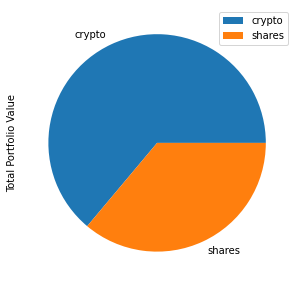

In [374]:
# Plotting Savings in Pie Chart ! 
savings_df.plot.pie(y='Amount', figsize=(5,5), label= 'Total Portfolio Value')

### **Having Some Fun**  with <u>***f"-strings***</u> 

In [375]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Your rainy-day-fund target is $ {emergency_fund}")

# Calculate total amount of savings
total_savings = savings_df['Amount'].sum()

print(f" Your current savings total is $ {total_savings:,}")

if total_savings < emergency_fund:
    print(f"you are $({emergency_fund}-{total_savings}) away from reaching your goal. KEEP GOING!!!")
elif total_savings == emergency_fund:
    print(f" YOU DID IT !!! You have enough saved up for a rainy day and reaching your financial goal.")
elif total_savings > emergency_fund:
            print(f" You're way ahead! Keep investing!!!")
            


Your rainy-day-fund target is $ 36000
 Your current savings total is $ 116,776.985
 You're way ahead! Keep investing!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [337]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [338]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['SPY', 'AGG']

df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high      low   close   volume     open   
time                                                                           
2017-03-30 00:00:00-04:00  108.52  108.58  108.380  108.41  1611863  235.490   
2017-03-31 00:00:00-04:00  108.44  108.53  108.420  108.52  3151075  235.905   
2017-04-03 00:00:00-04:00  108.31  108.68  108.300  108.67  3857775  235.800   
2017-04-04 00:00:00-04:00  108.61  108.65  108.520  108.56  1482935  235.000   
2017-04-05 00:00:00-04:00  108.48  108.74  108.453  108.69  1900282  236.260   

                                                              
                             high      low   close    volume  
time                                                          
2017-03-30 00:00:00-04:00  236.52  235.270  236.27  40604487  
2017-03-31 00:00:00-04:00  236.51  235.680  235.71  47583793  
2017-04-03 00:00:00-04:00  236.03  233.910  235.37  58627715  
2017-04-04 00:00:00-04:00  235.58  234.555  235.51  43130784  
2017-04-05 00:00:00-04:00  237.39  234.540  234.77  84819899

### Thanks to Sabahat for uncovering if/else workarund for Alpacas API 1000 day limit. With 252 trading days, that defaults to 3.9 years.  We need 5 years worth of data. 
 In fact, in any true Monte Carlo situation, we would want to pull data from as far back as possible (excluding only the listing bracket: when prices usually soar, then settle) Listing momentum isn't conducive to qualitative projections.  Different firms might have different approaches of course, 
 
For quantitative data integrity, I would most likely leave out the listing volatility. 


tickers = ['SPY', 'AGG']
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()
def more_bars(alpaca, tickers, number_days=1260, start = None, end = None):
    df_more = pd.DataFrame()
    df_temp = pd.DataFrame()
    
    
    if num_days<=1000:
        df_more=alpaca.get_barset(tickers, timeframe, limit=number_days, start=start_date, end=end_date, after=None, until=None).df
        
    else:
            num_cycles, residual=divmod(number_days,1000)
            df_more=alpaca.get_barset(tickers, timeframe, limit=residual, start=start, end=None, after=Non, until=None).df
            
            for i in range(1, num_cycle+1):
                df_temp = alpaca.get_barset(tickers, timeframe, limit = 1000, start=start_date, end=None, after=None, until=df_more.first_valid_index().isoformat()).df
            print(first_valid_index)
            print(df.first_valid_index().isoformat())
            df_more = pd.concat([df_more, df_temp])

            df_more.sort_index(inplace=True)
            return df_more

more_bars(tickers, start_date, end_date)


### Unfortunately, my configuration above - did not work. 
---
### I can still pull data manually setting up 2 dataframes to concat
---



In [339]:
# DATAFRAME 1 


start_date = pd.Timestamp('2018-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

tickers = ['SPY', 'AGG']

df_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Display sample data
df_1.head(100)

AGG                                         \
                             open      high      low    close     volume   
time                                                                       
2018-03-19 00:00:00-04:00  106.56  106.7400  106.530  106.580  2068013.0   
2018-03-20 00:00:00-04:00  106.44  106.5100  106.400  106.410  2769390.0   
2018-03-21 00:00:00-04:00  106.32  106.4800  106.080  106.410  2841377.0   
2018-03-22 00:00:00-04:00  106.67  106.8000  106.490  106.610  2789748.0   
2018-03-23 00:00:00-04:00  106.46  106.7000  106.460  106.610  2569628.0   
...                           ...       ...      ...      ...        ...   
2018-08-02 00:00:00-04:00  105.76  105.7600  105.650  105.730  2989387.0   
2018-08-03 00:00:00-04:00  105.81  105.9799  105.810  105.930  2286629.0   
2018-08-06 00:00:00-04:00  106.03  106.1100  106.000  106.030  2974758.0   
2018-08-07 00:00:00-04:00  105.97  105.9700  105.825  105.840  2368151.0   
2018-08-08 00:00:00-04:00  105.83  105.9100  105.800  105.845  1613011.0   

                              SPY                                       
                             open    high       low   close     volume  
time                                                                    
2018-03-19 00:00:00-04:00  273.33  273.38  268.6200  270.49   77851316  
2018-03-20 00:00:00-04:00  270.93  271.67  270.1800  270.94   38399686  
2018-03-21 00:00:00-04:00  270.90  273.27  270.1900  270.43   59831437  
2018-03-22 00:00:00-04:00  267.91  268.87  263.3600  263.67  105012105  
2018-03-23 00:00:00-04:00  264.16  265.02  257.8300  258.01  117338697  
...                           ...     ...       ...     ...        ...  
2018-08-02 00:00:00-04:00  279.38  282.58  279.1600  282.34   42491022  
2018-08-03 00:00:00-04:00  282.53  283.65  282.3300  283.64   34485363  
2018-08-06 00:00:00-04:00  283.56  284.99  283.2015  284.68   29906355  
2018-08-07 00:00:00-04:00  285.39  286.01  285.2400  285.54   32455420  
2018-08-08 00:00:00-04:00  285.39  285.91  284.9400  285.42   29142601  

[100 rows x 10 columns]

In [340]:
# DATAFRAME 2


start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2018-03-19', tz='America/New_York').isoformat()

tickers = ['SPY', 'AGG']

df_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000,
).df

# Display sample data
df_2.head(100)

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202   
...                           ...       ...       ...      ...      ...   
2016-08-04 00:00:00-04:00  112.54  112.6600  112.5000  112.555  1768667   
2016-08-05 00:00:00-04:00  112.54  112.5400  112.1350  112.170  2299946   
2016-08-08 00:00:00-04:00  112.16  112.3150  112.0300  112.240  2345254   
2016-08-09 00:00:00-04:00  112.40  112.5400  112.3000  112.520  2800287   
2016-08-10 00:00:00-04:00  112.61  112.7300  112.5400  112.670  2102720   

                              SPY                                       
                             open      high      low   close    volume  
time                                                                    
2016-03-21 00:00:00-04:00  204.07  204.9400  203.800  204.68  55119916  
2016-03-22 00:00:00-04:00  203.76  205.2300  203.570  204.59  71913432  
2016-03-23 00:00:00-04:00  204.11  204.3300  203.010  203.24  67124272  
2016-03-24 00:00:00-04:00  202.00  203.1600  201.740  203.14  63975239  
2016-03-28 00:00:00-04:00  203.61  203.8600  202.705  203.26  51054477  
...                           ...       ...      ...     ...       ...  
2016-08-04 00:00:00-04:00  216.30  216.7800  214.250  216.41  38363982  
2016-08-05 00:00:00-04:00  217.21  218.2300  217.070  218.17  48577434  
2016-08-08 00:00:00-04:00  218.40  218.5200  217.740  218.03  33419531  
2016-08-09 00:00:00-04:00  218.13  218.7600  217.800  218.17  42694221  
2016-08-10 00:00:00-04:00  218.30  218.4038  217.230  217.64  45610104  

[100 rows x 10 columns]

In [341]:
# concat dataframe 

df_fiveyear = pd.concat([df_1, df_2], axis ="rows", join='outer')
df_fiveyear.sort_index(inplace=True)
df_fiveyear.head()


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255.0   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871.0   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804.0   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598.0   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202.0   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2016-03-21 00:00:00-04:00  204.07  204.94  203.800  204.68  55119916  
2016-03-22 00:00:00-04:00  203.76  205.23  203.570  204.59  71913432  
2016-03-23 00:00:00-04:00  204.11  204.33  203.010  203.24  67124272  
2016-03-24 00:00:00-04:00  202.00  203.16  201.740  203.14  63975239  
2016-03-28 00:00:00-04:00  203.61  203.86  202.705  203.26  51054477

### YES ! Success. At least now I have a clean dataframe. 

In [342]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_fiveyear,
    weights = [.40,.60],            #setting the weights.  60% stock, and 40% bond for each respective ticker
    num_simulation = 500,           #minimum at 500.  For commercial use to any degree of confidence - (source #1 - indicates 100,000 - 500,000 simulations)
    num_trading_days = 252*30       #252 trading days a year, and run for 30 years thus (252*30)
)

MC_30.portfolio_data.head(10)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255.0   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871.0   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804.0   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598.0   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202.0   
2016-03-29 00:00:00-04:00  110.35  110.5700  110.2100  110.525  1689199.0   
2016-03-30 00:00:00-04:00  110.49  110.5600  110.3055  110.500  2522223.0   
2016-03-31 00:00:00-04:00  110.52  110.8500  110.5200  110.820  5120808.0   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.540  5013983.0   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.590  3018930.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2016-03-21 00:00:00-04:00          NaN  204.07  204.94  203.800  204.68   
2016-03-22 00:00:00-04:00    -0.000546  203.76  205.23  203.570  204.59   
2016-03-23 00:00:00-04:00     0.002185  204.11  204.33  203.010  203.24   
2016-03-24 00:00:00-04:00     0.000227  202.00  203.16  201.740  203.14   
2016-03-28 00:00:00-04:00     0.000499  203.61  203.86  202.705  203.26   
2016-03-29 00:00:00-04:00     0.003131  202.76  205.21  202.400  205.15   
2016-03-30 00:00:00-04:00    -0.000226  206.29  206.87  205.590  206.07   
2016-03-31 00:00:00-04:00     0.002896  205.91  206.41  205.330  205.55   
2016-04-01 00:00:00-04:00    -0.002527  204.34  207.14  203.980  206.89   
2016-04-04 00:00:00-04:00     0.000452  206.83  207.07  205.890  206.27   

                                                  
                             volume daily_return  
time                                              
2016-03-21 00:00:00-04:00  55119916          NaN  
2016-03-22 00:00:00-04:00  71913432    -0.000440  
2016-03-23 00:00:00-04:00  67124272    -0.006599  
2016-03-24 00:00:00-04:00  63975239    -0.000492  
2016-03-28 00:00:00-04:00  51054477     0.000591  
2016-03-29 00:00:00-04:00  78767332     0.009298  
2016-03-30 00:00:00-04:00  67161152     0.004485  
2016-03-31 00:00:00-04:00  66645503    -0.002523  
2016-04-01 00:00:00-04:00  82800637     0.006519  
2016-04-04 00:00:00-04:00  47328510    -0.002997

In [343]:
# Plot simulation outcomes
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998887,1.003962,0.995918,1.000238,1.000289,1.002869,0.999230,0.995800,1.012951,1.000824,...,0.994411,1.002022,1.004725,1.005847,1.006209,0.993857,0.997119,1.007008,0.988435,1.001249
2,0.990470,1.008623,0.997924,0.989123,0.998172,1.009061,0.993877,1.000942,1.011478,1.001533,...,0.997922,1.005651,1.017641,1.002643,1.003994,1.004418,1.011130,1.002138,0.989713,0.987164
3,0.998376,1.005593,1.002817,0.989075,0.987984,1.009012,1.007885,1.004201,1.008155,1.016891,...,0.997156,1.009396,1.013219,1.000247,1.002864,1.008124,1.006827,1.005240,0.985327,0.989051
4,0.994630,1.011842,1.008774,0.978862,0.988364,1.012131,0.989474,0.993846,1.012675,1.021610,...,0.990331,1.010892,0.996921,0.992841,1.000488,1.007219,1.000893,1.012256,1.004653,0.983917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,16.088412,8.524106,11.871123,4.293339,5.261495,17.403258,6.799015,37.392234,4.435444,10.559501,...,13.579434,6.401611,3.880195,8.413686,9.836086,6.300295,35.364408,5.872177,19.624923,5.742225
7557,16.357953,8.583535,11.901265,4.325329,5.194140,17.380865,6.763728,37.404067,4.415204,10.665535,...,13.567195,6.376068,3.912084,8.430136,9.946448,6.293404,35.168456,5.849993,19.558647,5.796855
7558,16.322761,8.701294,11.911951,4.307419,5.182113,17.472208,6.814413,37.319920,4.411338,10.639453,...,13.632687,6.339805,3.912459,8.489451,10.084472,6.252277,35.355616,5.850944,19.663238,5.744233
7559,16.235420,8.828272,12.005546,4.278285,5.173296,17.487601,6.855362,37.612165,4.422079,10.597943,...,13.589759,6.346782,3.926887,8.527393,10.078800,6.245815,34.982173,5.881493,19.861382,5.804796


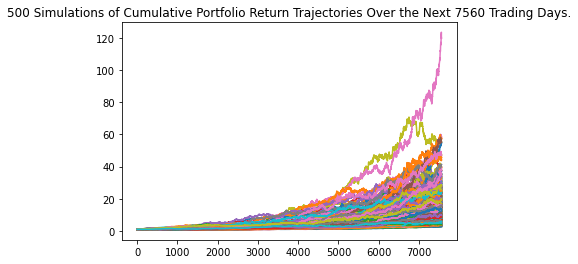

In [344]:
# Plot simulation outcomes
line_plot = MC_30.plot_simulation()


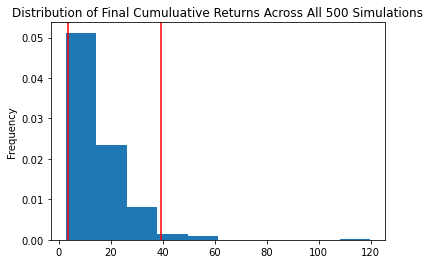

In [345]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30.plot_distribution()
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [346]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             14.969000
std              10.685673
min               2.641218
25%               8.165021
50%              12.153366
75%              18.910811
max             119.836593
95% CI Lower      3.526908
95% CI Upper     39.488609
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [347]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} \n in the portfolio"
      f" over the next 30 years \n will end within in the range of" 
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $20,000 
 in the portfolio over the next 30 years 
 will end within in the range of $70,538.15 and $789,772.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [348]:
# Set initial investment
initial_investment = (20000*1.5)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" \n over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $30,000.0 in the portfolio 
 over the next 30 years will end within in the range of $105,807.23 and $1,184,658.26


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [349]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_fiveyear,
    weights = [.05,.95],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_fiveyear.portfolio_data.head(10)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255.0   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871.0   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804.0   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598.0   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202.0   
2016-03-29 00:00:00-04:00  110.35  110.5700  110.2100  110.525  1689199.0   
2016-03-30 00:00:00-04:00  110.49  110.5600  110.3055  110.500  2522223.0   
2016-03-31 00:00:00-04:00  110.52  110.8500  110.5200  110.820  5120808.0   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.540  5013983.0   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.590  3018930.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2016-03-21 00:00:00-04:00          NaN  204.07  204.94  203.800  204.68   
2016-03-22 00:00:00-04:00    -0.000546  203.76  205.23  203.570  204.59   
2016-03-23 00:00:00-04:00     0.002185  204.11  204.33  203.010  203.24   
2016-03-24 00:00:00-04:00     0.000227  202.00  203.16  201.740  203.14   
2016-03-28 00:00:00-04:00     0.000499  203.61  203.86  202.705  203.26   
2016-03-29 00:00:00-04:00     0.003131  202.76  205.21  202.400  205.15   
2016-03-30 00:00:00-04:00    -0.000226  206.29  206.87  205.590  206.07   
2016-03-31 00:00:00-04:00     0.002896  205.91  206.41  205.330  205.55   
2016-04-01 00:00:00-04:00    -0.002527  204.34  207.14  203.980  206.89   
2016-04-04 00:00:00-04:00     0.000452  206.83  207.07  205.890  206.27   

                                                  
                             volume daily_return  
time                                              
2016-03-21 00:00:00-04:00  55119916          NaN  
2016-03-22 00:00:00-04:00  71913432    -0.000440  
2016-03-23 00:00:00-04:00  67124272    -0.006599  
2016-03-24 00:00:00-04:00  63975239    -0.000492  
2016-03-28 00:00:00-04:00  51054477     0.000591  
2016-03-29 00:00:00-04:00  78767332     0.009298  
2016-03-30 00:00:00-04:00  67161152     0.004485  
2016-03-31 00:00:00-04:00  66645503    -0.002523  
2016-04-01 00:00:00-04:00  82800637     0.006519  
2016-04-04 00:00:00-04:00  47328510    -0.002997

In [350]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014750,1.015325,0.980845,1.002342,1.002661,0.992319,1.001677,0.991329,0.985172,1.011142,...,1.023981,0.981094,1.001480,1.026467,1.004827,1.018137,0.998714,0.998475,0.998792,1.009360
2,1.007808,0.990089,0.970998,1.003379,0.990432,0.998841,1.005276,0.986622,1.010692,1.010021,...,1.043179,0.973185,0.996381,1.008734,1.013952,1.008131,1.011432,0.996231,1.016502,1.024808
3,1.029562,0.985220,0.978704,1.005179,0.968515,1.010545,1.000897,0.999357,1.002626,1.002351,...,1.047932,0.969986,0.999596,0.993852,1.025265,1.015592,1.011180,1.020473,1.034316,1.019845
4,1.033825,0.974754,0.980109,1.016707,0.970950,1.004714,1.025466,0.980594,0.985124,0.999991,...,1.046495,0.957513,0.994983,0.985052,1.023864,1.009706,1.015210,1.029005,1.027690,1.037735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.362326,3.185371,3.049554,2.284223,2.422209,1.547606,3.184449,3.341854,2.148218,1.372180,...,3.809492,1.290871,2.055371,2.293187,0.942739,1.662043,1.877761,1.258274,0.999539,0.900906
1257,2.409347,3.184576,3.064590,2.313901,2.468046,1.520870,3.170529,3.322607,2.160993,1.363483,...,3.843729,1.304036,2.069217,2.292299,0.932932,1.632034,1.878370,1.269197,0.996214,0.921019
1258,2.371484,3.269499,3.066395,2.340789,2.444148,1.527436,3.179054,3.398644,2.156211,1.357623,...,3.805521,1.296956,2.045945,2.263009,0.922662,1.586724,1.919402,1.290051,0.989056,0.913014
1259,2.400917,3.256426,3.054204,2.350323,2.441703,1.514301,3.238853,3.445113,2.156213,1.376375,...,3.769470,1.325783,2.027079,2.277034,0.910093,1.573993,1.893009,1.304191,0.974372,0.904034


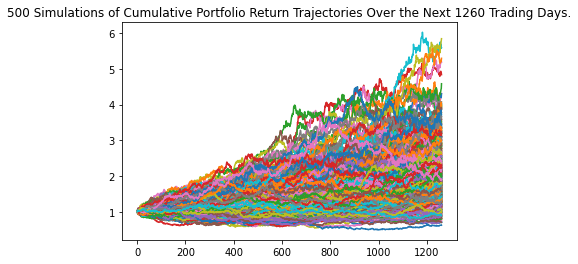

In [351]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()


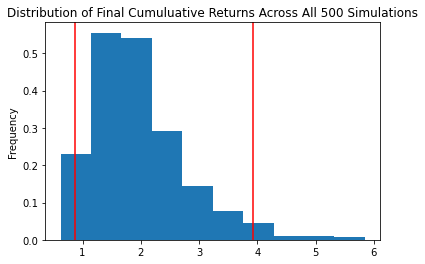

In [352]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()


In [353]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.960463
std               0.819215
min               0.622426
25%               1.376809
50%               1.812947
75%               2.287822
max               5.844680
95% CI Lower      0.867297
95% CI Upper      3.932560
Name: 1260, dtype: float64


In [354]:
# Set initial investment
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} \n in the portfolio"
      f" over the next 5 years \n will end within in the range of" 
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $50,000 
 in the portfolio over the next 5 years 
 will end within in the range of $43,364.86 and $196,627.98


In [356]:
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} \n in the portfolio"
      f" over the next 5 years \n will end within in the range of" 
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $100,000 
 in the portfolio over the next 5 years 
 will end within in the range of $86,729.73 and $393,255.96


### Ten Years Retirement Option

In [357]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten = MCSimulation(
    portfolio_data = df_fiveyear,
    weights = [.10,.90],
    num_simulation = 5000,
    num_trading_days = 252*10
)

MC_ten.portfolio_data.head(10)

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-21 00:00:00-04:00  110.06  110.1300  109.9100  109.920  1999255.0   
2016-03-22 00:00:00-04:00  110.27  110.2700  109.8300  109.860  1709871.0   
2016-03-23 00:00:00-04:00  109.96  110.1400  109.8601  110.100  2750804.0   
2016-03-24 00:00:00-04:00  110.29  110.2900  110.0300  110.125  2704598.0   
2016-03-28 00:00:00-04:00  110.15  110.2999  110.0800  110.180  2759202.0   
2016-03-29 00:00:00-04:00  110.35  110.5700  110.2100  110.525  1689199.0   
2016-03-30 00:00:00-04:00  110.49  110.5600  110.3055  110.500  2522223.0   
2016-03-31 00:00:00-04:00  110.52  110.8500  110.5200  110.820  5120808.0   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.540  5013983.0   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.590  3018930.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2016-03-21 00:00:00-04:00          NaN  204.07  204.94  203.800  204.68   
2016-03-22 00:00:00-04:00    -0.000546  203.76  205.23  203.570  204.59   
2016-03-23 00:00:00-04:00     0.002185  204.11  204.33  203.010  203.24   
2016-03-24 00:00:00-04:00     0.000227  202.00  203.16  201.740  203.14   
2016-03-28 00:00:00-04:00     0.000499  203.61  203.86  202.705  203.26   
2016-03-29 00:00:00-04:00     0.003131  202.76  205.21  202.400  205.15   
2016-03-30 00:00:00-04:00    -0.000226  206.29  206.87  205.590  206.07   
2016-03-31 00:00:00-04:00     0.002896  205.91  206.41  205.330  205.55   
2016-04-01 00:00:00-04:00    -0.002527  204.34  207.14  203.980  206.89   
2016-04-04 00:00:00-04:00     0.000452  206.83  207.07  205.890  206.27   

                                                  
                             volume daily_return  
time                                              
2016-03-21 00:00:00-04:00  55119916          NaN  
2016-03-22 00:00:00-04:00  71913432    -0.000440  
2016-03-23 00:00:00-04:00  67124272    -0.006599  
2016-03-24 00:00:00-04:00  63975239    -0.000492  
2016-03-28 00:00:00-04:00  51054477     0.000591  
2016-03-29 00:00:00-04:00  78767332     0.009298  
2016-03-30 00:00:00-04:00  67161152     0.004485  
2016-03-31 00:00:00-04:00  66645503    -0.002523  
2016-04-01 00:00:00-04:00  82800637     0.006519  
2016-04-04 00:00:00-04:00  47328510    -0.002997

In [358]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015392,0.989742,0.985996,1.008483,0.997095,1.007974,1.009096,0.998641,0.991473,1.009003,...,1.014902,0.997999,0.989582,1.027712,0.977901,1.010493,0.977780,0.980544,1.010585,0.989668
2,1.018745,1.009141,0.997860,1.013612,1.008667,1.012394,1.009328,0.997815,1.010183,1.006299,...,1.007304,1.012693,1.002675,1.019606,0.985618,1.009545,0.970471,0.971501,1.008886,0.988996
3,1.032440,1.003911,0.988778,1.008209,1.022030,1.007852,1.007090,1.000115,1.015010,0.987029,...,1.034193,1.002202,1.008848,1.014554,1.005539,1.010041,0.974569,0.979413,1.010584,0.984317
4,1.030718,1.013974,0.992365,0.992194,0.999799,1.016284,1.014148,0.993076,1.019541,0.996978,...,1.047558,0.999920,0.995443,1.030648,1.024890,0.985399,0.969114,0.981493,0.995684,0.977377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.477555,2.060311,2.755611,8.582906,2.592357,1.292752,6.094106,2.842656,2.289719,4.721239,...,1.097455,4.351164,5.376964,4.385793,1.289500,1.236042,4.555179,2.292889,3.237657,6.590705
2517,1.493047,2.084239,2.743752,8.433789,2.598051,1.285653,6.096591,2.852299,2.326502,4.707470,...,1.104720,4.432460,5.356171,4.434060,1.264894,1.236176,4.615114,2.279949,3.209055,6.603447
2518,1.482110,2.076800,2.717400,8.477164,2.658386,1.311731,6.051371,2.861761,2.318771,4.758854,...,1.114630,4.458433,5.330107,4.529894,1.247275,1.237016,4.599652,2.294634,3.184904,6.668634
2519,1.480200,2.092876,2.719058,8.605345,2.650022,1.321670,6.119863,2.865561,2.302931,4.885019,...,1.118677,4.442876,5.377808,4.588893,1.245095,1.233600,4.613692,2.308820,3.145959,6.780409


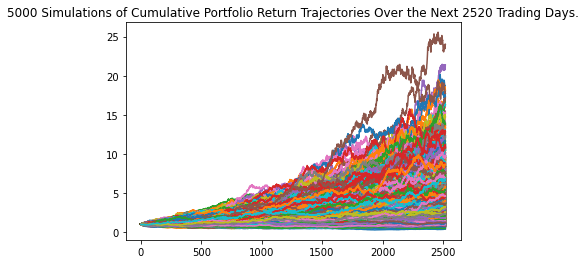

In [359]:
# Plot simulation outcomes
line_plot = MC_ten.plot_simulation()


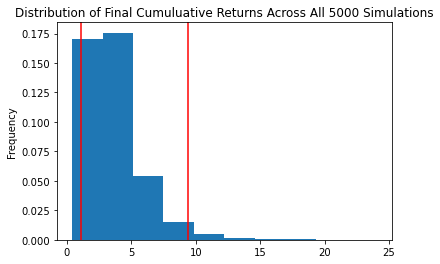

In [360]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten.plot_distribution()


In [311]:
# Fetch summary statistics from the Monte Carlo simulation results 
# I should really - run a separate set of cells, but this simulation was with 40% stock and 60% bonds

tbl = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.360257
std               0.235059
min               0.694887
25%               1.197208
50%               1.353132
75%               1.509214
max               2.241079
95% CI Lower      0.935192
95% CI Upper      1.839164
Name: 1260, dtype: float64


In [327]:
# Fetch summary statistics from the Monte Carlo simulation results
# This simulation - ^ reflected in the simulation setup above - is 90% stocks and 10% bonds 
tbl = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              3.837848
std               2.350442
min               0.470341
25%               2.303756
50%               3.275173
75%               4.721280
max              15.644400
95% CI Lower      1.164830
95% CI Upper     10.643844
Name: 2520, dtype: float64


In [335]:
# Fetch summary statistics from the Monte Carlo simulation results 
# I should really - run a separate set of cells, but this simulation was with 40% stock and 60% bonds

tbl = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.234420
std               0.199374
min               0.863429
25%               1.078177
50%               1.223857
75%               1.348971
max               1.884710
95% CI Lower      0.927139
95% CI Upper      1.735659
Name: 2520, dtype: float64


In [361]:
# Fetch summary statistics from the Monte Carlo simulation results 
# I should really - run a separate set of cells, but this simulation was with 90% stock and 10% bonds

tbl = MC_ten.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           5000.000000
mean               3.638489
std                2.175649
min                0.397905
25%                2.155476
50%                3.177673
75%                4.476674
max               24.030874
95% CI Lower       1.074819
95% CI Upper       9.358889
Name: 2520, dtype: float64


In [362]:
initial_investment = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} \n in the portfolio"
      f" over the next 10 years \n will end within in the range of" 
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $50,000 
 in the portfolio over the next 10 years 
 will end within in the range of $53,740.95 and $467,944.43


This last simulation was run with a mix of 90% stock and 10% bond. 
Of course this simulation is not realistic as no fiduciary would suggest their client choose 1 stock ticker and 1 bond ticker. 
However, this mix is demonstrative of the power of each asset classification: 

    Stocks are far more volatile, and bonds while stable, may be a good hedge during good times but fail to even counteract the forces of inflation during bad times. 
    
In this last scenario, MC_10 - simulating 10 years to retirement, I find the most realistic. 5 years is far too short, unless starting capital is significant, and the client is willing to take unreasonable risks; in which case they may be better off letting that money sit safely in a savings account rather than gambling it away in the marketplace for a few short years. The 5-year scenario also belies the fact that a client with so much capital would likely not need to "retire" within that short timeframe. 

Conversely, the 30-year scenario in 2021 is likewise unrealistic as the MC_5 year, because how many 20-yr-olds are walking around with their personal financial planner on speed dial ready to make portfolio adjustments following rolling earnings reports and/or Treasury or Fed CPI updates in view of optimizing their 30+ year portfolio ? 

To wit, the 10 year to 15 year simulation will likely be most salient in providing usable information.  Therein, I ran 5000 MC iterations to simulate a more precise projection as compared to the 100-shorthand, or 500 (so provided in accompanying instructions). 

What this tells us, is that running 5000 iterations, with historic data over the past 5 years, allocating $50,000 to starting capital, and allocating 90% to stocks, and 10% to bonds - yields a range of $53,000 to $467,000. 
    
    Using a compound inflation calculator - $50,000 in 2021 will be worth $64,000 in 2031 [10 years]. 

Therefore, at the 95% confidence interval
    we can say that over the course of 10 years, it would be better to put money into some kind of asset, other than letting it sit as liquid currency, and that while returns will depend upon market conditions, there is a greater than average chance that $50,000 invested will appreciate within the range of $53,000 to $467,000 but also a tiny chance that a market crash could eradicate all earning and/or effectively go to 0.
    
 Provided that the 95% confidence interval is based upon a standard deviation of 2.175, reaching out to 3 standard deviations (effectuating a $0 or negative return), while not impossible, is highly unlikely. 
 
 



#    <u>Resources
    
1. https://www.valuationresearch.com/wp-content/uploads/kb/SpecialReport_MonteCarloSimulationTrials.pdf
2. Sabahat 
3. Sammy 
4. Siege 
6. Gerrit 
7. https://smartasset.com/investing/inflation-calculator#Mw02oBCc5l